In [202]:
import warnings
warnings.filterwarnings('ignore')

In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style(style='whitegrid')

In [204]:
df = pd.read_csv('car_data.csv')

In [205]:
# Quick view to get know no. columns, total records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [206]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [207]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [208]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


### Check missing value

In [209]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [210]:
final_df=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [211]:
final_df['current_year'] = 2020

In [212]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [213]:
final_df['no_year'] = final_df['current_year'] - final_df['Year']

In [214]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [215]:
final_df.drop(['Year','current_year'], axis=1, inplace=True)

In [216]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


### Encoding categorical features

In [217]:
final_df = pd.get_dummies(final_df, drop_first=True)

In [218]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [219]:
## make column names lower case
final_df.columns = map(str.lower, final_df.columns)

### Checking correlation

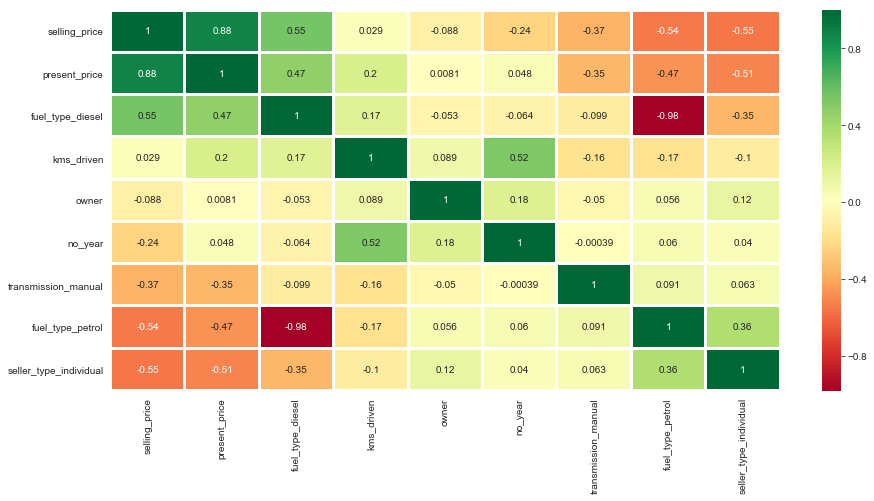

In [221]:
cols = final_df.corr()['selling_price'].sort_values(ascending=False).index
cm = final_df[cols].corr()

plt.figure(figsize=(15,7))
sns.heatmap(data=cm, annot=True, cmap='RdYlGn', lw=2)
plt.show()

### Splitting data

In [225]:
X = final_df.iloc[:,1:]
y = final_df.iloc[:,0]

In [226]:
X.head()

,present_price,kms_driven,owner,no_year,fuel_type_diesel,fuel_type_petrol,seller_type_individual,transmission_manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [227]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: selling_price, dtype: float64

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [230]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('---------------------')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (240, 8)
y_train:  (240,)
---------------------
X_test:  (61, 8)
y_test:  (61,)


### Hyperparameter tuning

In [231]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [232]:
para = {
            'n_estimators':[100,500,900,1100,1500],
            'max_depth':[2,3,5,10,15],
            'booster':['gbtree','gblinear'],
            'learning_rate':[0.05,0.1,0.15,0.20],
            'min_child_weight':[1,2,3,4]
}

In [233]:
xgb = XGBRegressor(random_state=42)

In [234]:
rf = RandomizedSearchCV(estimator=xgb, param_distributions=para, scoring='neg_mean_squared_error', n_iter=10, cv=5, random_state=42, n_jobs=-1)

In [235]:
rf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'booster': ['gbtree', 'gblinear'], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'min_child_weight': [1, 2, 3, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [237]:
rf.best_params_

{'n_estimators': 1100,
 'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.05,
 'booster': 'gbtree'}

In [238]:
bst_model = rf.best_estimator_
bst_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=1100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [239]:
print('Train score: ', bst_model.score(X_train,y_train))
print('Test score: ', bst_model.score(X_test,y_test))

Train score:  0.9999999139398279
Test score:  0.9659084431284675


In [240]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [241]:
y_pred = bst_model.predict(X_test)

In [242]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.5792336669906241
MSE: 0.8617431435984364
RMSE: 0.9283012138300997


In [243]:
print('Mean difference bet.actual and predicted: ', np.mean(y_test - y_pred))

Mean difference bet.actual and predicted:  0.3460685923842134


### Plotting prediction

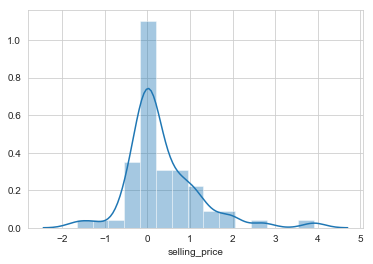

In [244]:
sns.distplot(y_test - y_pred)

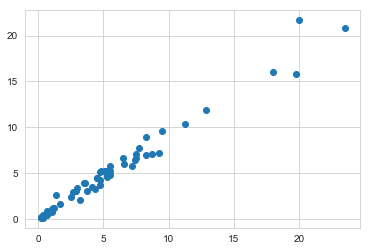

In [245]:
plt.scatter(y_test, y_pred)

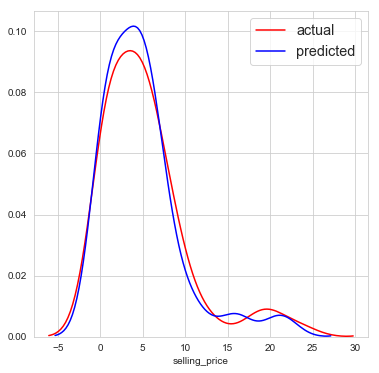

In [246]:
plt.figure(figsize=(6,6))
sns.distplot(y_test, hist=False, color='r', label='actual')
sns.distplot(y_pred, hist=False, color='b', label='predicted')
plt.legend(fontsize='x-large')
plt.show()

### Saving model

In [247]:
import pickle
with open('vehicle_selling_price_prediction.pkl','wb') as fp:
    pickle.dump(bst_model, fp)

In [251]:
import json
columns = { 'data_columns':list(X.columns) }

with open('columns.json','w') as fp:
    fp.write(json.dumps(columns))